<a href="https://colab.research.google.com/github/ShubhamShaswat/Digit_Recognizer/blob/master/Digits_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from google.colab import files


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential,Model,Input
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,Activation
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [0]:
#!pip install kaggle


In [3]:
# download dataset
file=files.upload()
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c digit-recognizer

Saving kaggle.json to kaggle.json
 78% 57.0M/73.2M [00:00<00:00, 139MB/s]
100% 73.2M/73.2M [00:00<00:00, 165MB/s]
100% 48.8M/48.8M [00:00<00:00, 83.5MB/s]

  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 27.5MB/s]


In [107]:
#files in system
!ls

cnn_mnist_datagen1.csv	cnn_mnist_datagen4.csv	sample_submission.csv
cnn_mnist_datagen2.csv	kaggle.json		test.csv
cnn_mnist_datagen3.csv	sample_data		train.csv


In [0]:
#load dataset
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')


In [6]:
#explore dataset
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Y train
Y_train=train['label']

#drop Labels
train=train.drop('label',axis=1)
X_train=train




In [0]:
#free space
del train

In [111]:
X_train.shape

(42000, 784)

In [0]:
X_train=X_train.values.reshape(-1,28,28,1)

In [24]:
#shape of X_train
X_train.shape

(42000, 28, 28, 1)

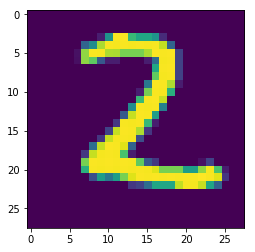

In [114]:
plt.imshow(X_train[101,:,:,0])

In [0]:
#check for nulll values
X_train.isnull().any().describe()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


<BarContainer object of 10 artists>

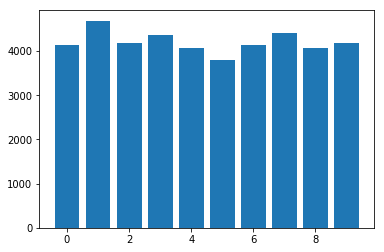

In [47]:
print(Y_train.value_counts())

plt.bar(Y_train.value_counts().keys(),Y_train.value_counts())


In [0]:
#normalise X_input
X_train=X_train/255

#Y_train tp category
Y_train=to_categorical(Y_train,num_classes=10)

In [0]:
#split into train and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)


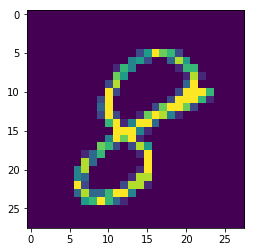

In [117]:
plt.imshow(X_train[0,:,:,0])

In [0]:
def model(input_shape):
  
  X_input = Input(input_shape)
  
  #Conv2D with 32 filtres
  X = Conv2D(filters=32,kernel_size=(5,5),padding='same')(X_input)
  
  #Activation layer relu
  X = Activation('relu')(X)
  
   #Conv2D with 32 filtres
  X = Conv2D(filters=32,kernel_size=(5,5),padding='same')(X)
  
  #Activation layer relu
  X = Activation('relu')(X)
  
  #maxpool 2d pool size=2,2
  X = MaxPool2D(pool_size=(2,2))(X)
  
  #Dropout layer
  X = Dropout(0.5)(X)
  
  
   #Conv2D with 64 filtres
  X = Conv2D(filters=64,kernel_size=(3,3),padding='same')(X_input)
  
  #Activation layer relu
  X = Activation('relu')(X)
  
   #Conv2D with 64 filtres
  X = Conv2D(filters=64,kernel_size=(3,3),padding='same')(X)
  
  #Activation layer relu
  X = Activation('relu')(X)
  
  #maxpool 2d pool size=2,2
  X = MaxPool2D(pool_size=(2,2),strides=(2,2))(X)
  
  #Dropout layer
  X = Dropout(0.5)(X)
  
  #flatten
  X = Flatten()(X)
  
  #Dense Layer
  X = Dense(256,activation='relu')(X)
  
  #Dropout layer
  X = Dropout(0.5)(X)
  
  #output layer 
  X = Dense(10,activation='softmax')(X)
  
  model=Model(inputs=X_input,outputs=X)
  
  return model
  
  
  
  
  
  

In [0]:
model=model((28,28,1))
model.compile(optimizer = 'RMSProp' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [94]:
history=model.fit(X_train, Y_train, batch_size = 128, epochs = 20, validation_data = (X_val, Y_val), verbose = 1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 5s 130us/step - loss: 0.2489 - acc: 0.9236 - val_loss: 0.0831 - val_acc: 0.9738
Epoch 2/20
37800/37800 [==============================] - 4s 114us/step - loss: 0.0828 - acc: 0.9734 - val_loss: 0.0469 - val_acc: 0.9848
Epoch 3/20
37800/37800 [==============================] - 4s 113us/step - loss: 0.0648 - acc: 0.9803 - val_loss: 0.0491 - val_acc: 0.9857
Epoch 4/20
37800/37800 [==============================] - 4s 113us/step - loss: 0.0514 - acc: 0.9843 - val_loss: 0.0427 - val_acc: 0.9876
Epoch 5/20
37800/37800 [==============================] - 4s 113us/step - loss: 0.0473 - acc: 0.9859 - val_loss: 0.0387 - val_acc: 0.9886
Epoch 6/20
37800/37800 [==============================] - 4s 114us/step - loss: 0.0413 - acc: 0.9869 - val_loss: 0.0418 - val_acc: 0.9867
Epoch 7/20
37800/37800 [==============================] - 4s 114us/step - loss: 0.0400 - acc: 0.9877 - val_loss: 0.0479 - v

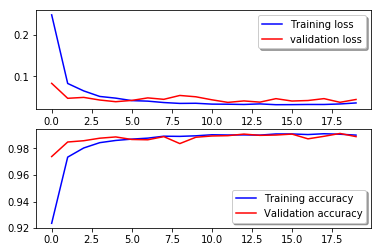

In [95]:
fig,ax=plt.subplots(2,1)

ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
#Data Augmenation

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [121]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=128),epochs =2, validation_data = (X_val,Y_val),verbose = 1, steps_per_epoch=X_train.shape[0] , callbacks=[learning_rate_reduction])

Epoch 1/2
37800/37800 [==============================] - 1130s 30ms/step - loss: 0.1409 - acc: 0.9654 - val_loss: 0.0780 - val_acc: 0.9895
Epoch 2/2
37800/37800 [==============================] - 1117s 30ms/step - loss: 0.1880 - acc: 0.9591 - val_loss: 0.1058 - val_acc: 0.9881


In [0]:
#test 

X_test=test/255

X_test=X_test.values.reshape(-1,28,28,1 )
results = model.predict(X_test)


In [0]:
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")


In [0]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

In [0]:
submission.to_csv("cnn_mnist_datagen_wa.csv",index=False)


In [0]:
files.download('cnn_mnist_datagen_wa.csv')

In [0]:
#plot model digram

from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
files.download('model.png')